In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle
import numpy as np

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle1/face_data/'

In [4]:
X, labelsMat, img, img_shape, ddX = datasets.Datasets().face_data(fpath='../data/face_data.mat', n_pca=100)

Applying PCA
explained_variance_ratio: [0.27073666 0.21588143 0.11532737 0.05268885 0.03676116 0.03058018
 0.02061402 0.01944693 0.0147146  0.01439268 0.01123745 0.00974153
 0.0085553  0.00807061 0.00718988 0.0064372  0.00624037 0.0059714
 0.00530276 0.00516626 0.00481279 0.00455245 0.00441138 0.00430953
 0.00372531 0.00367393 0.00346734 0.00326829 0.00311477 0.00281929
 0.00269904 0.00261192 0.00250414 0.00233172 0.00221375 0.00217475
 0.00211349 0.00203028 0.00195882 0.00183885 0.00177978 0.00169355
 0.001631   0.00161528 0.00156851 0.00154672 0.00147594 0.00141817
 0.00132714 0.00128395 0.00123372 0.00121142 0.00115612 0.0011338
 0.00106072 0.00105098 0.00102611 0.00101171 0.00096268 0.00092572
 0.0009055  0.00089253 0.00089095 0.00085524 0.00083057 0.00082879
 0.00080361 0.0007656  0.00075982 0.00072552 0.00070419 0.00069457
 0.0006843  0.0006542  0.0006429  0.00061812 0.00060201 0.00058916
 0.00056577 0.00055274 0.00054725 0.00053955 0.00053013 0.0005137
 0.00050383 0.00048759 0.0

# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, d=2, eta_min=4, k=12, N=25, max_iter0=30,
                     tau=5, delta=0.25, to_tear=False, 
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'jet', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,1]})

Using LDLE_1
A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 174 points processed...
A_k, Atilde_k: 348 points processed...
A_k, Atilde_k: 522 points processed...
A_k, Atilde_k: 696 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 174 points processed...
local_param: 348 points processed...
local_param: 522 points processed...
local_param: 696 points processed...
local_param: all 698 points processed...
After iter 1, max distortion is 35.996322
After iter 2, max distortion is 22.904074
After iter 3, max distortion is 22.904074
After iter 4, max distortion is 22.904074
After iter 5, max distortion is 22.904074
After iter 6, max distortion is 22.904074
After iter 7, max distortion is 22.904074
After iter 8, max distortion is 22.904074
After iter 9, max distortion is 22.904074
After iter 10, max distortion is 22.904074
Max local distortion = 22.90407441759515
#########

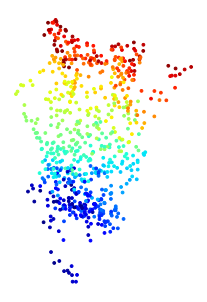

###############
Took 0.4 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.019423385212483473


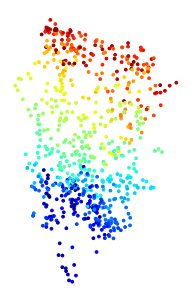

Iteration: 1
error: 0.018652274266704273
Iteration: 2
error: 0.018650138332015256
Iteration: 3
error: 0.018646966640740163
Iteration: 4
error: 0.018641453789917117
Iteration: 5
error: 0.018634648822825475


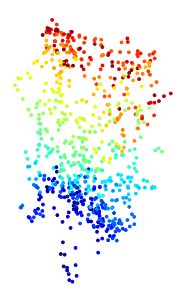

Iteration: 6
error: 0.018629671547486154
Iteration: 7
error: 0.018624264051666638
Iteration: 8
error: 0.01861943480102408
Iteration: 9
error: 0.018615662761368883
Iteration: 10
error: 0.01861205688332544


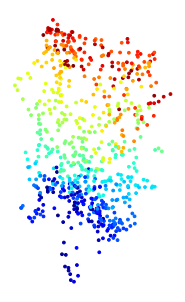

Iteration: 11
error: 0.018609033088026673
Iteration: 12
error: 0.018606148408980047
Iteration: 13
error: 0.01860408624235889
Iteration: 14
error: 0.018602093054531654
Iteration: 15
error: 0.018600089752560542


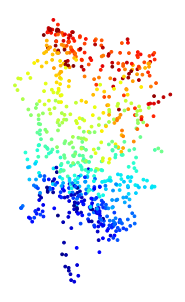

Iteration: 16
error: 0.01859862818377551
Iteration: 17
error: 0.018597338182593848
Iteration: 18
error: 0.0185963129124886
Iteration: 19
error: 0.018595053034784363
Iteration: 20
error: 0.018594254599184987


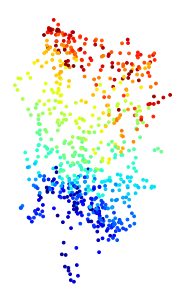

Iteration: 21
error: 0.018593238820921464
Iteration: 22
error: 0.01859267249772807
Iteration: 23
error: 0.018592094462509267
Iteration: 24
error: 0.018591453848506353
Iteration: 25
error: 0.01859108086367338


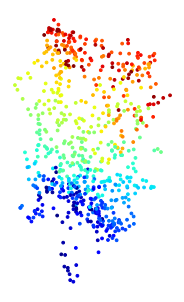

Iteration: 26
error: 0.018590423486062158
Iteration: 27
error: 0.018590248423014454
Iteration: 28
error: 0.018590173595867798
Iteration: 29
error: 0.018589682702949868


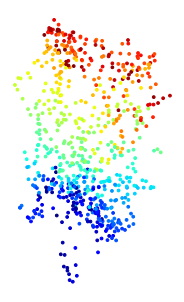

###############
Took 52.9 seconds to refine global embedding.
###############
###############
Took 53.3 seconds to perform step 3: compute global embedding.
###############


In [6]:
%matplotlib inline
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj, img, img_shape], f)

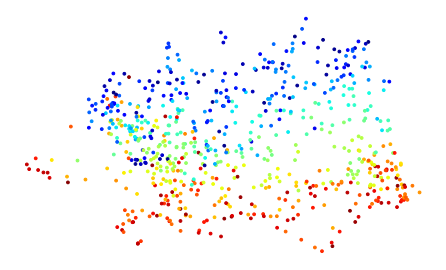

In [8]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final[:,[1,0]], labelsMat[:,0], 'jet', title='LDLE0')

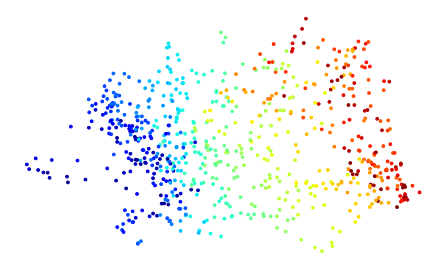

In [9]:
%matplotlib inline
ldle_obj.vis.global_embedding(ldle_obj.y_final[:,[1,0]], labelsMat[:,1], 'jet', title='LDLE1')

# LTSA

In [10]:
from matplotlib import pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

5


/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/scipy/sparse/linalg/eigen/arpack/arpack.py:936: LinAlgWarning: Diagonal number 255 is exactly zero. Singular matrix.
  self.M_lu = lu_factor(M)
<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/dhkohli/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


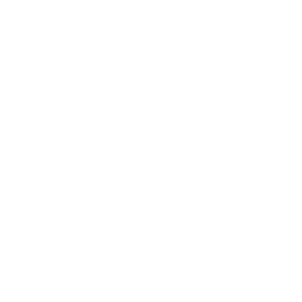

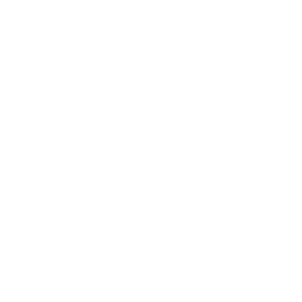

10


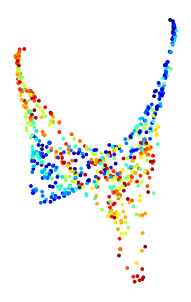

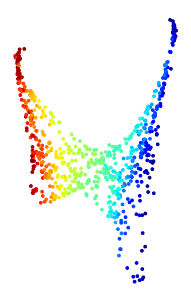

25


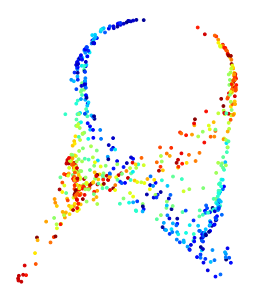

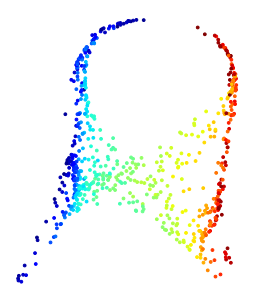

15


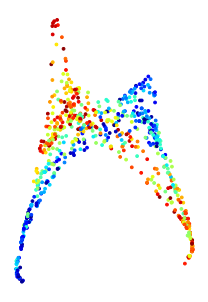

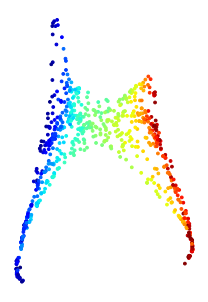

75


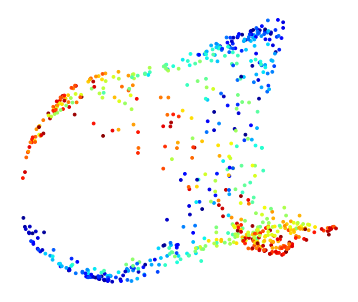

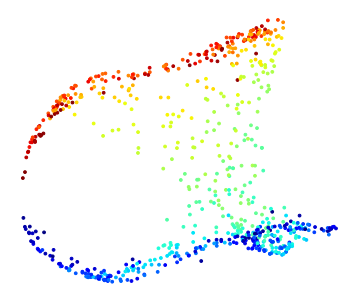

100


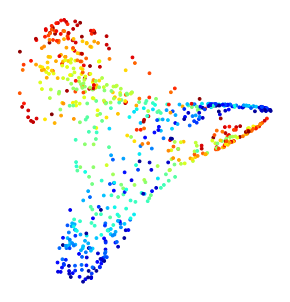

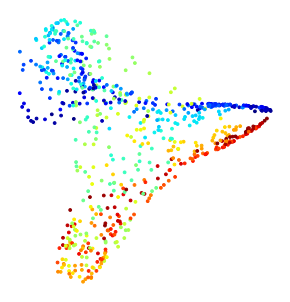

In [11]:
for n_neighbors in [5,10,25,15,75,100]:
    print(n_neighbors)
    ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=n_neighbors,
                                      n_components=2, n_jobs=-1, random_state=42)
    y_ltsa = ltsa_obj.fit_transform(X)
    vis.global_embedding(y_ltsa, labelsMat[:,0], 'jet', title='LTSA0_'+str(n_neighbors))
    plt.show()
    vis.global_embedding(y_ltsa, labelsMat[:,1], 'jet', title='LTSA1_'+str(n_neighbors))
    plt.show()

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

25 0.01


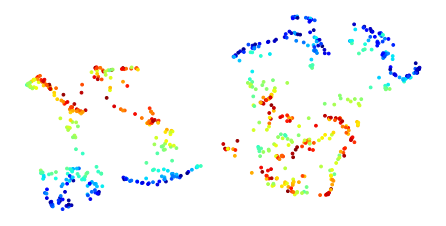

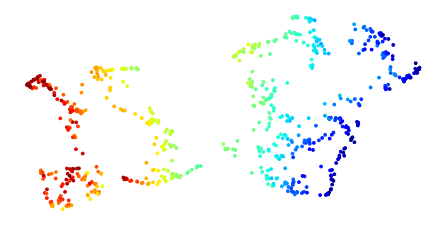

25 0.1


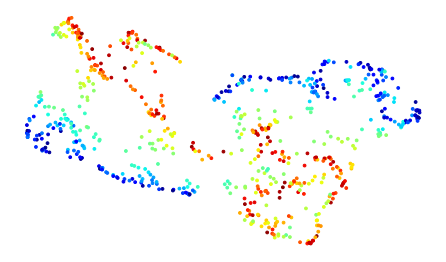

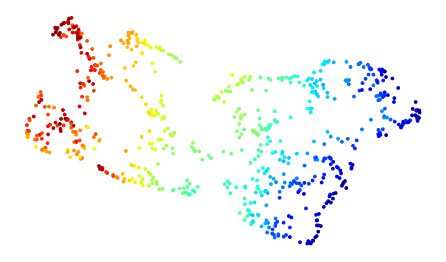

25 0.25


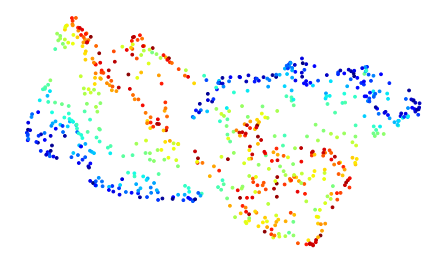

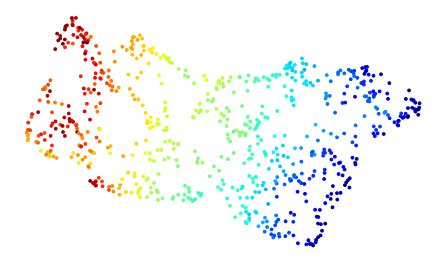

25 0.5


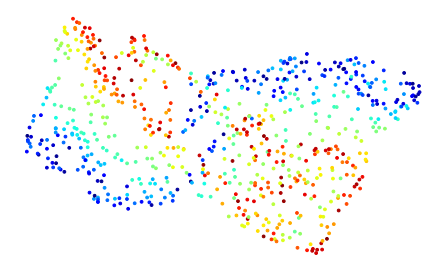

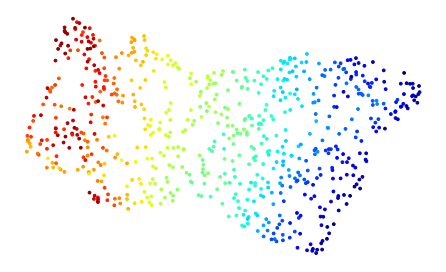

50 0.01


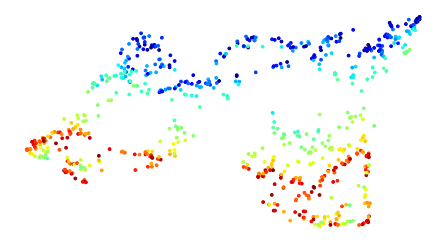

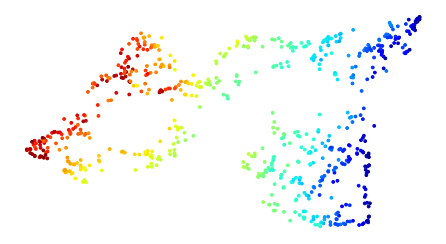

50 0.1


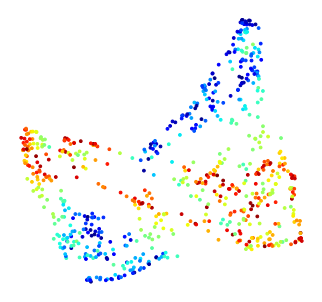

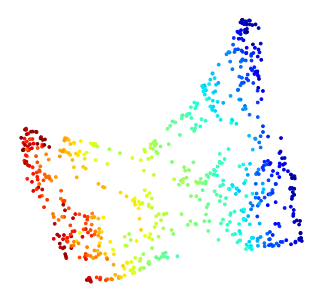

50 0.25


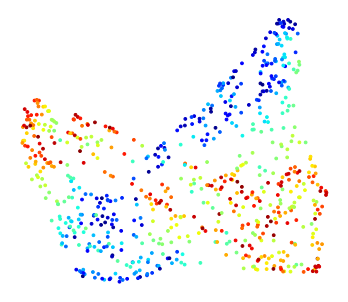

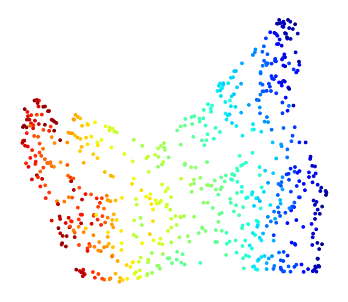

50 0.5


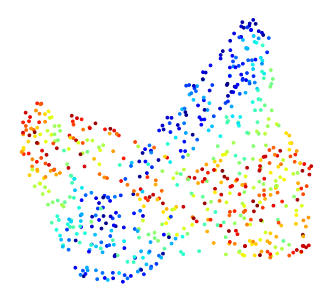

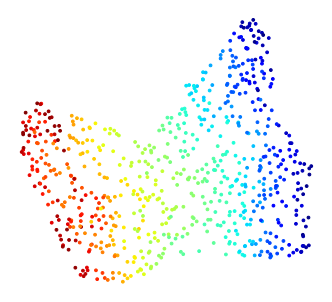

100 0.01


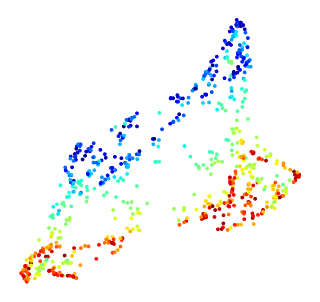

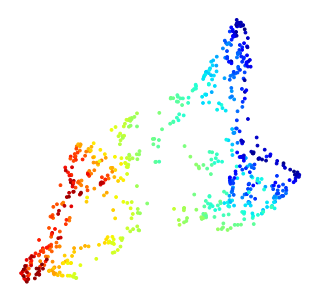

100 0.1


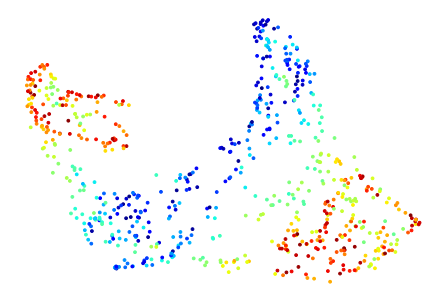

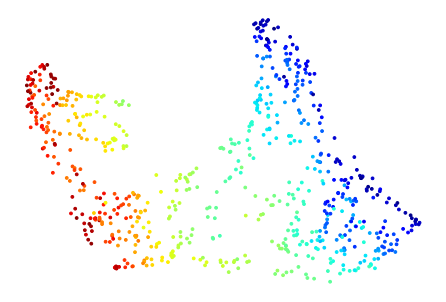

100 0.25


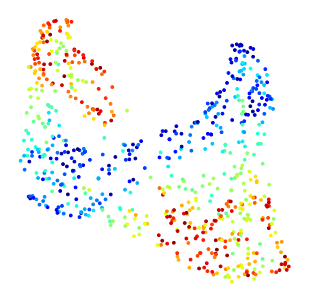

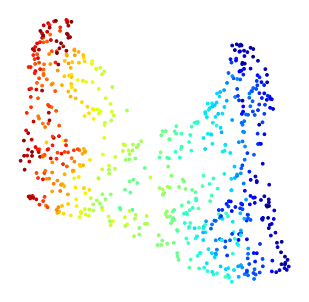

100 0.5


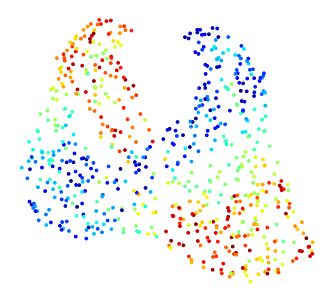

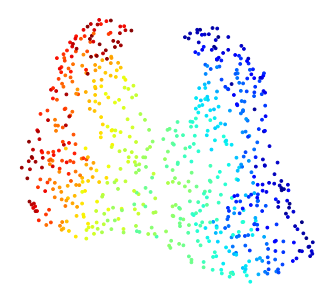

200 0.01


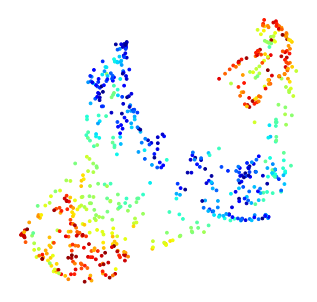

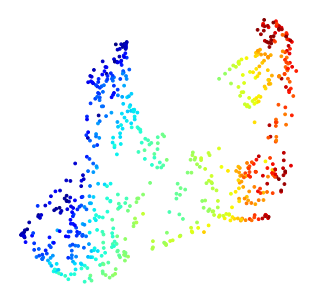

200 0.1


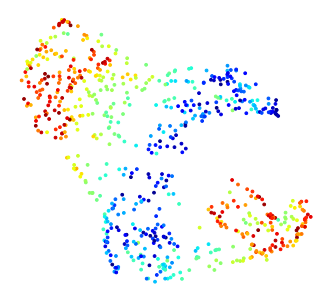

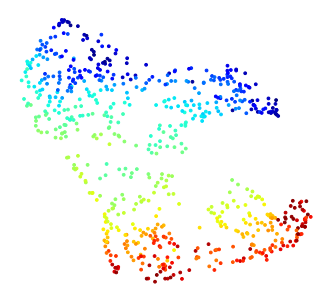

200 0.25


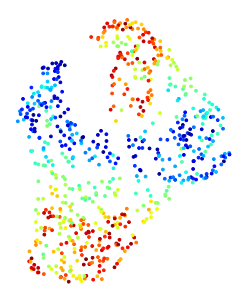

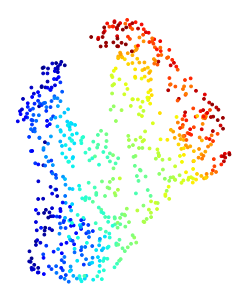

200 0.5


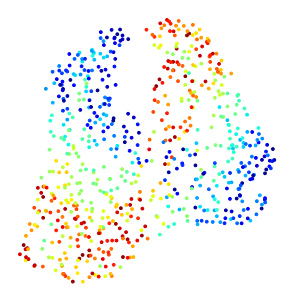

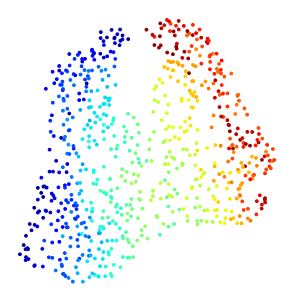

In [13]:
for n_neighbors in [25,50,100,200]:
    for min_dist in [0.01,0.1,0.25,0.5]:
        print(n_neighbors, min_dist)
        umap_obj = UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=2,
                        random_state=42, n_epochs=500, metric='euclidean')
        y_umap = umap_obj.fit_transform(X)
        vis.global_embedding(y_umap, labelsMat[:,0], 'jet', title='UMAP0_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()
        vis.global_embedding(y_umap, labelsMat[:,1], 'jet', title='UMAP1_'+str(n_neighbors)+'_'+str(min_dist))
        plt.show()

# t-SNE

In [14]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

30 2


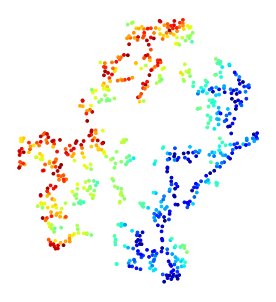

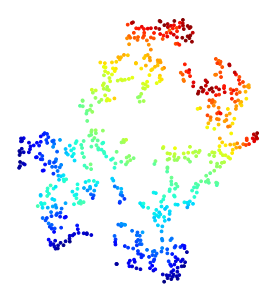

30 4


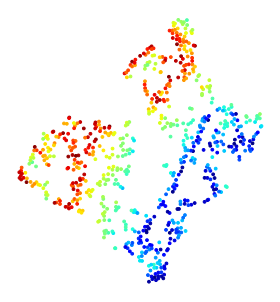

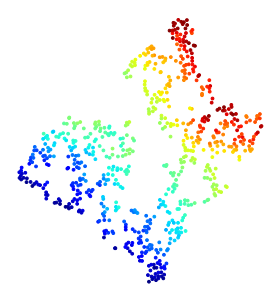

30 6


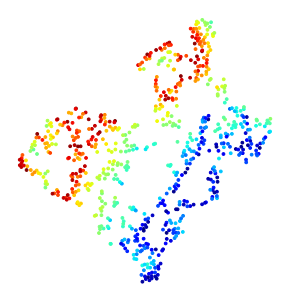

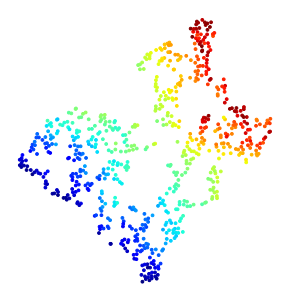

40 2


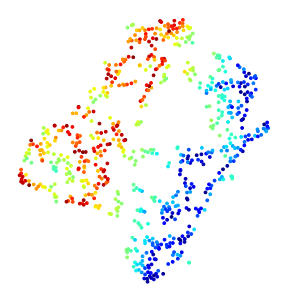

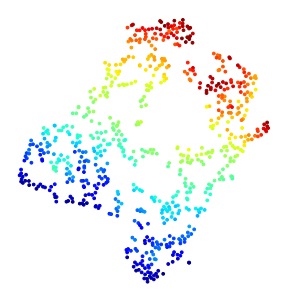

40 4


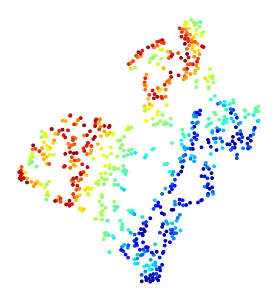

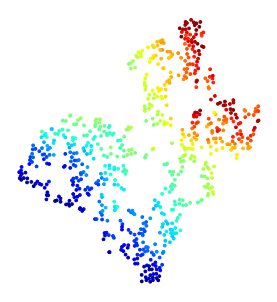

40 6


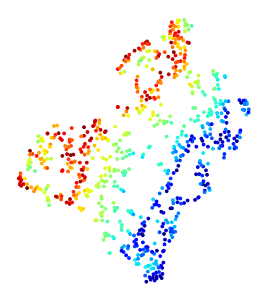

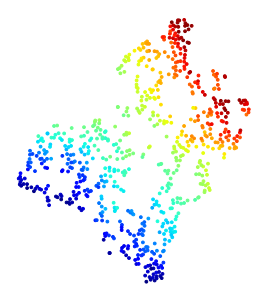

50 2


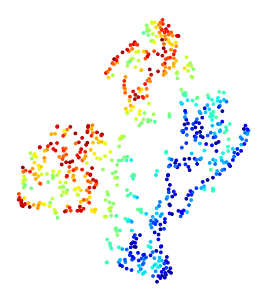

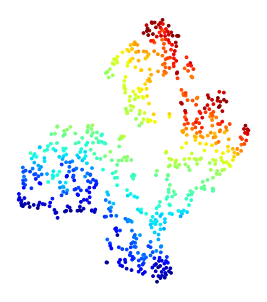

50 4


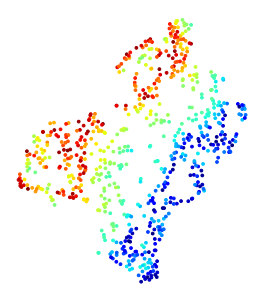

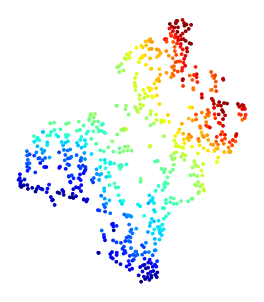

50 6


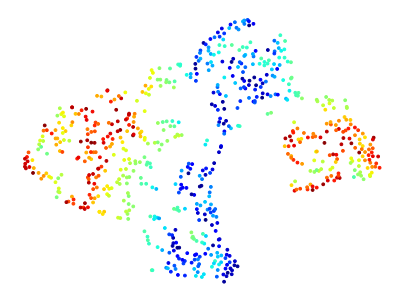

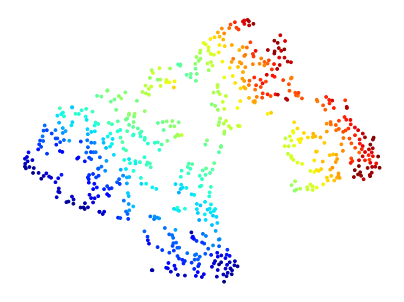

60 2


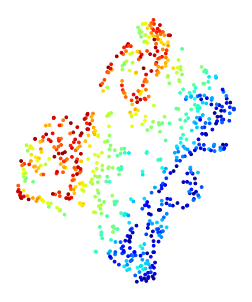

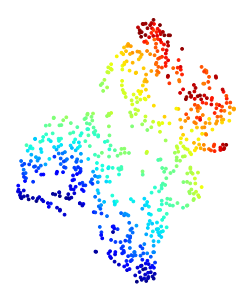

60 4


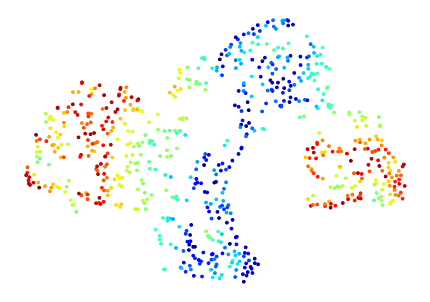

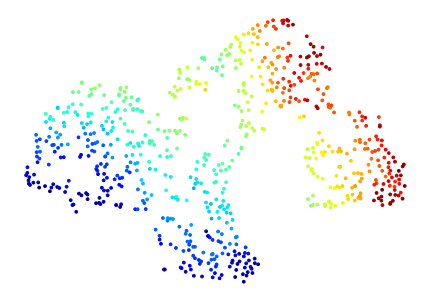

60 6


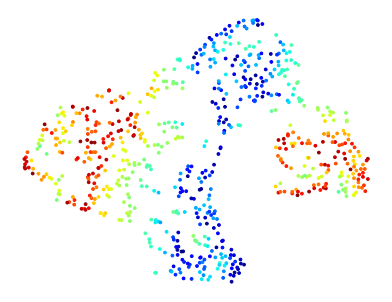

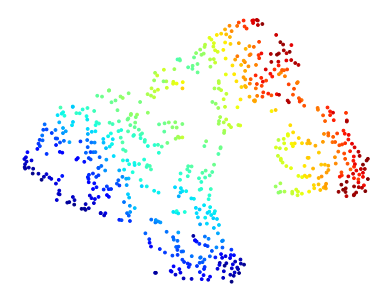

In [15]:
for perplexity in [30,40,50,60]:
    for ee in [2,4,6]:
        print(perplexity, ee)
        tsne_obj = TSNE(perplexity=perplexity, early_exaggeration=ee, n_components=2,
                        metric='euclidean', random_state=42, n_iter=1000,
                        n_jobs=-1, init='random')
        y_tsne = tsne_obj.fit_transform(X)
        vis.global_embedding(y_tsne, labelsMat[:,0], 'jet', title='t-SNE0_'+str(perplexity)+'_'+str(ee))
        plt.show()
        vis.global_embedding(y_tsne, labelsMat[:,1], 'jet', title='t-SNE1_'+str(perplexity)+'_'+str(ee))
        plt.show()